<a id="basic"></a>
# <b><span style='color:#254E89'>1 |</span><span style='color:#254E89'> Sơ lược dữ liệu</span></b>

In [1]:
#Độ phân giải - màu nền - dạng lưới
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.rcParams['figure.dpi'] = 100
sns.set(rc={'axes.facecolor': '#e6f3ff'}, style='whitegrid')
warnings.filterwarnings('ignore')

In [2]:
# Đọc dữ liệu
import pandas as pd
df = pd.read_csv('/kaggle/input/heart-disease/heart.csv')
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# kiểm tra dữ liệu - xem dữ liệu như thế nào - kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div style="border-radius:5px; color: black; padding: 10px; background-color: #b4d9fe; font-size:115%; text-align:left">
    
Khi xem dữ liệu, chia ra làm *2 loại* là **biến liên tục** và **biến phân loại**
    
+ __Biến Liên tục__ là biến : "age", "trestbps", "chol", "oldpeak"
+ __Biến Phân loại__ là biến: "sex", "cp", "fbs", "restecg", "thalach", "exang", "slope", "ca", "thal", "target" => Cho chuyển về kiểu dữ liệu "object" 

In [4]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
df[features_to_convert] = df[features_to_convert].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

# *Tóm tắt nhanh biến liên tục*

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


=> Cho thấy các giá trị **nhỏ nhất** - **trung bình** - **lớn nhất** của các cột dữ liệu biến liên tục

# *Tóm tắt nhanh biến phân loại*

In [6]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


=> Cho thấy **số lượng dữ liệu** - **số lượng kiểu dữ liệu đặc trưng** - **kiểu dữ liệu được xuất hiện nhiều nhất** -**số lượng kiểu dữ liệu nhiều nhất xuất hiện**

<a id="basic"></a>
# <b><span style='color:#254E89'>2 |</span><span style='color:#254E89'> Phân tích dữ liệu</span></b>

<div style="font-size:19px; text-align:left">
    
**2.1. Phân tích biến** : Sự phân bố, phạm vi của biến đó
    
>* *2.1.1. Phân tích biến liên tục*
>* *2.1.2. Phân tích biến phân loại*

  
**2.2. Phân tích độ quan trọng của biến đối với target**

<div style="font-size:20px; text-align:left">   

**2.1. Phân tích biến** : Sự phân bố, phạm vi của biến đó


<div style="font-size:18px; text-align:left">

> ***2.1.1. Phân tích biến liên tục***

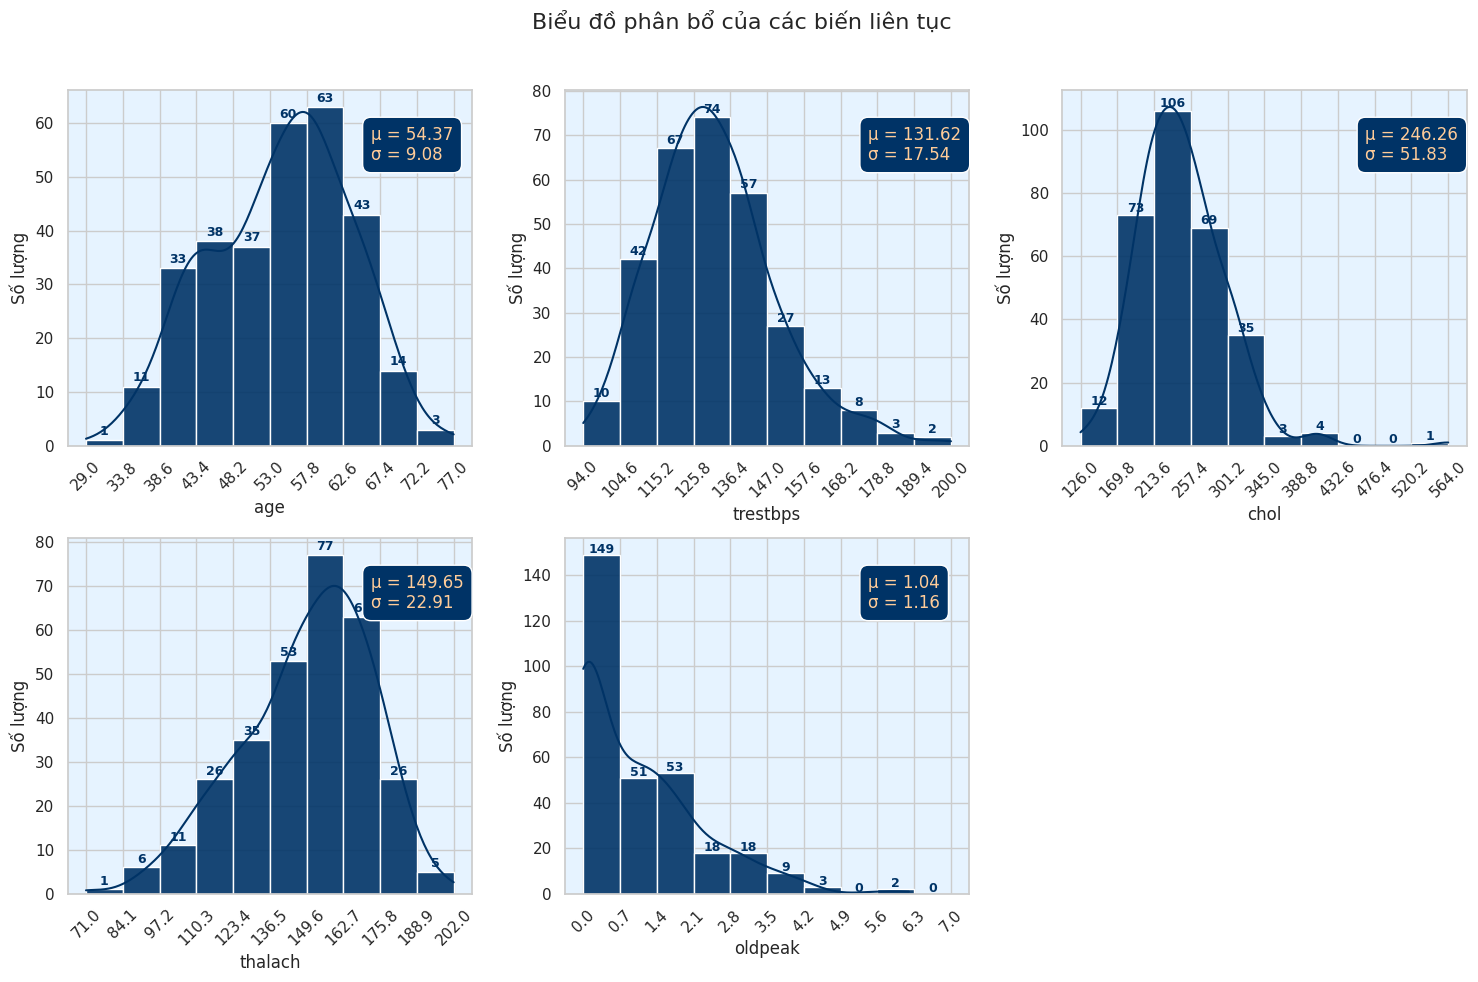

In [7]:
import numpy as np
import matplotlib.pyplot as plt

df_continuous = df[continuous_features]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) # hình ảnh và trục biểu đồ của riêng từng subplots 


for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], bins = 10, range = (np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max()))) # lam tron gia tri min va max, gia tri cua moi bin 
    
    graph = sns.histplot(data=df_continuous, x=col, kde=True, bins= bin_edges, ax=ax[x, y], color='#003366', alpha=0.9)
    ax[x, y].set_xlabel(col, fontsize=12)
    ax[x, y].set_ylabel('Số lượng')
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].tick_params(axis='x', rotation=45) # nghiêng các giá trị x 45 độ cho dễ đọc

    for j, p in enumerate(graph.patches): # duyệt qua từng cột và giá trị từng cột => in dữ liệu của cột
        ax[x, y].annotate('{}'.format(p.get_height()), 
                  (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                  ha='center', 
                  fontsize=9, 
                  fontweight="bold", 
                  color="#003366")
    # In phương sai và giá trị trung bình theo từng cột    
    mean_val = df_continuous[col].mean()
    std_val = df_continuous[col].std()
    textstr = f"μ = {mean_val:.2f}\nσ = {std_val:.2f}"
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='#ffcc99', bbox=dict(boxstyle='round', facecolor='#003366', edgecolor='white', pad=0.5))

# Ẩn ma trận cuối cùng
ax[1,2].axis('off')

plt.suptitle('Biểu đồ phân bổ của các biến liên tục', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


<div style="border-radius:5px; color: black; padding: 10px; background-color: #b4d9fe; font-size:12 px; text-align:left">
    
**Rút ra được:**
> **age** (Tuổi): Tuổi của các cá nhân phân bố khá đồng đều, nhưng tập trung nhiều vào khoảng cuối 50 tuổi. Điều này có nghĩa là hầu hết mọi người trong nhóm này nằm trong độ tuổi trung niên, với độ tuổi trung bình khoảng 54,37 tuổi. Sự phân tán ở đây không quá lớn, chỉ dao động trong khoảng 9,08 năm.

> **trestbps** (Huyết áp khi nghỉ ngơi): Huyết áp của phần lớn mọi người nằm trong khoảng 120-140 mm Hg. Điều này cho thấy rằng huyết áp của đa số người trong nhóm khá ổn định và không có sự dao động mạnh. Trung bình là 131,62 mm Hg, với độ phân tán ở mức vừa phải (17,54 mm Hg).

> **chol** (Mức cholesterol trong máu): Mức cholesterol của phần lớn mọi người dao động từ 200 đến 300 mg/dl, với giá trị trung bình là 246,26 mg/dl. Sự phân tán khá lớn (51,83 mg/dl), có nghĩa là có một số người có mức cholesterol cao hơn nhiều so với người khác.

> **thalach** (Nhịp tim tối đa đạt được ): Phần lớn các cá nhân đạt tần số tim trong khoảng từ 140 đến 170 nhịp/phút khi thực hiện bài kiểm tra căng thẳng. Điều này cho thấy tần số tim đạt được của nhóm này khá đồng đều và không có sự chênh lệch quá lớn, với trung bình khoảng 149,65 bpm.

>  **oldpeak** (Trầm cảm ST do tập thể dục): Hầu hết các giá trị giảm ST tập trung gần 0, có nghĩa là nhiều người không gặp phải sự giảm ST đáng kể khi thực hiện bài tập. Giá trị trung bình là 1,04 và độ phân tán là 1,16, cho thấy rằng sự giảm ST ở một số người có thể khá thấp, nhưng không có quá nhiều sự thay đổi lớn trong nhóm này.



<div style="font-size:18px; text-align:left">

> ***2.1.2. Phân tích biến phân loại***

In [8]:
categorical_features = df.columns.difference(continuous_features) #9 cột phân loại
df_categorical = df[categorical_features]

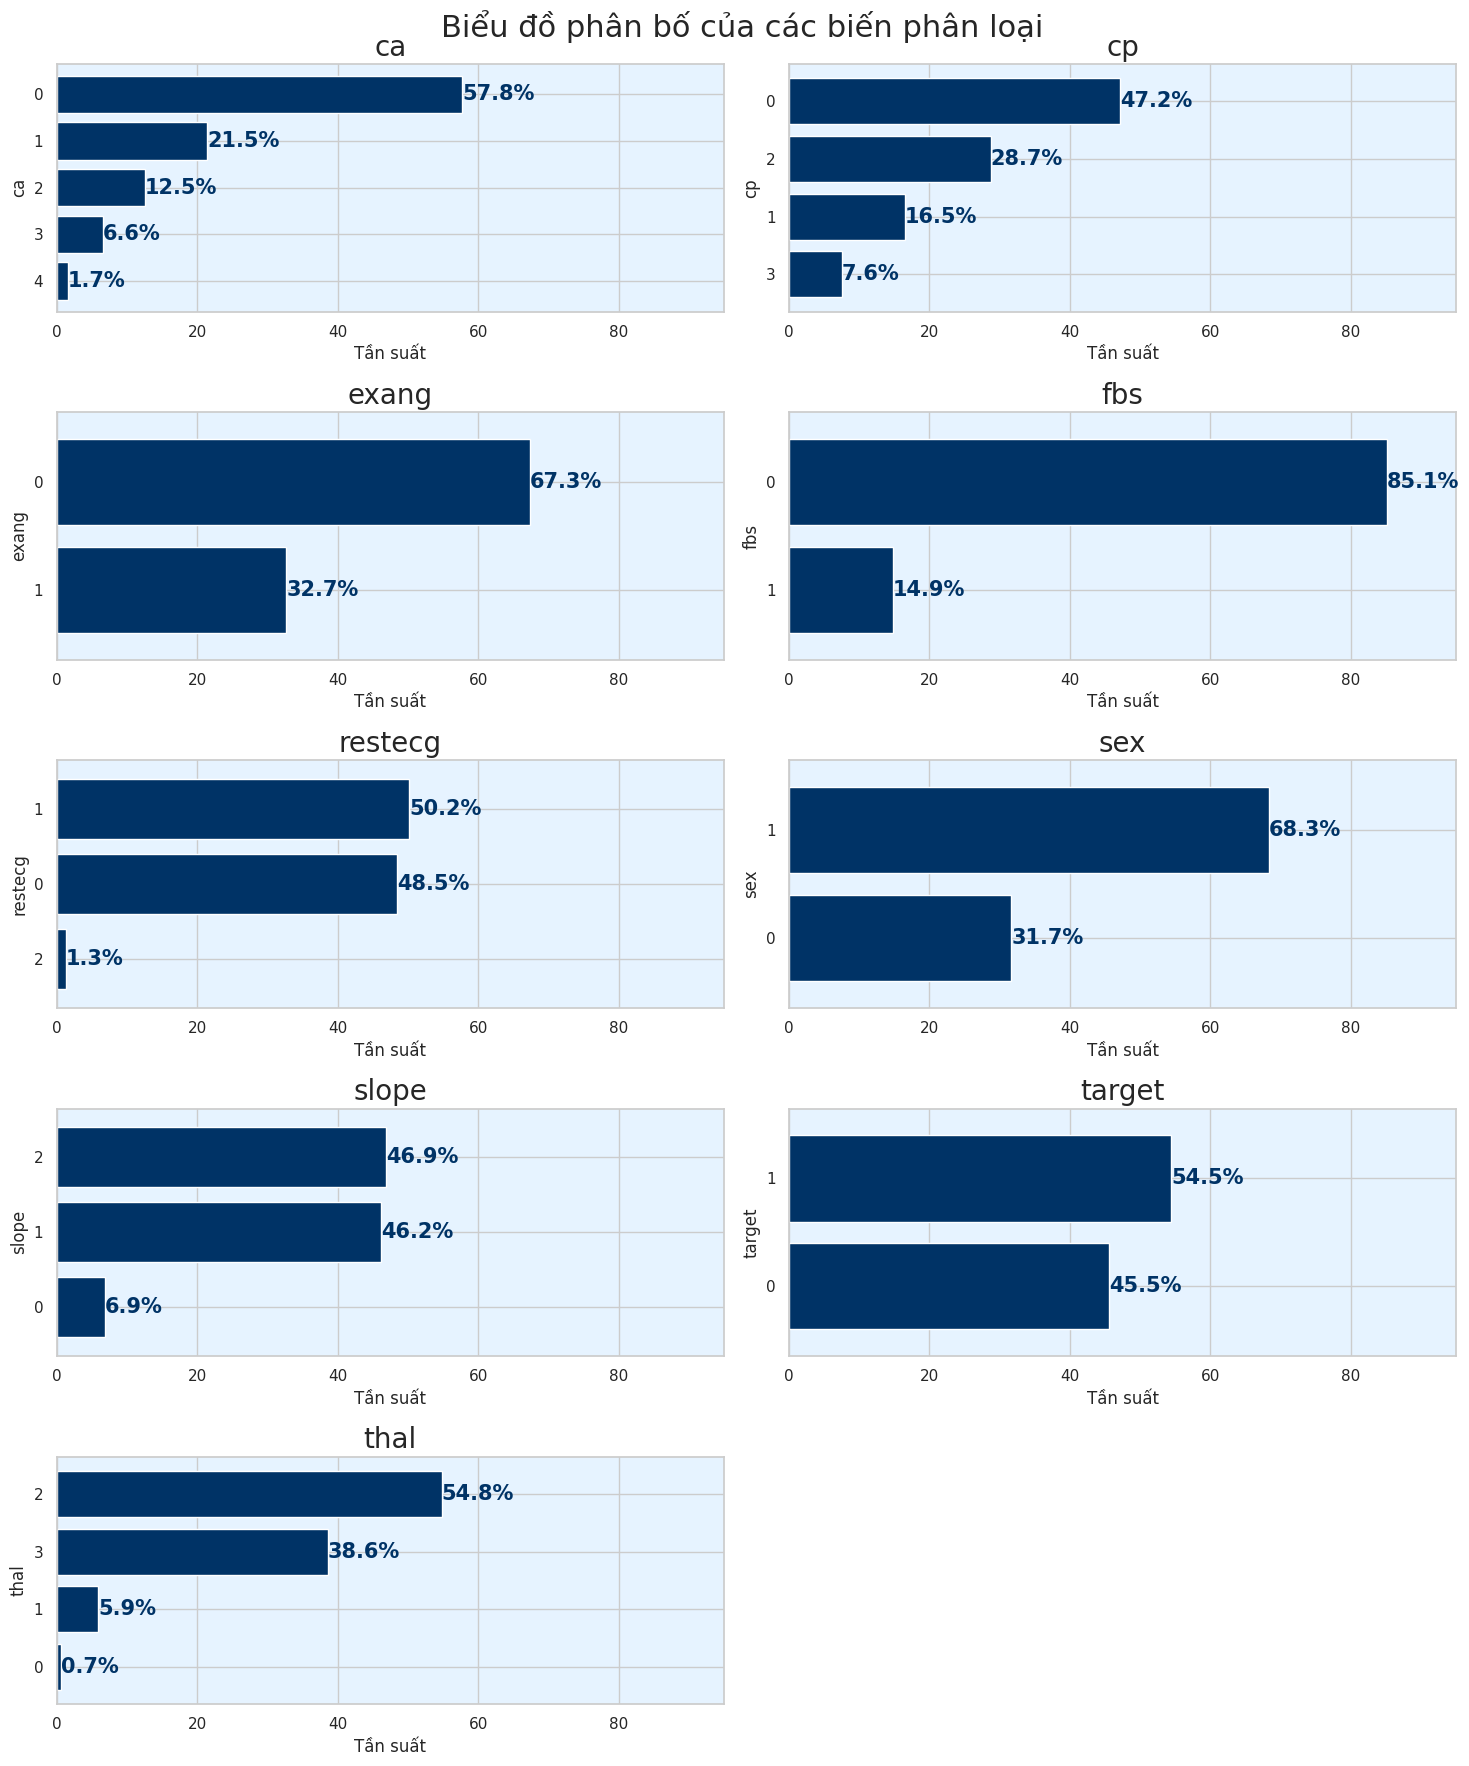

In [9]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values() # index kèm tuần suất của các giá trị phân loại theo % => sắp xếp
    
    # Vẽ biểu đồ thanh ngang
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='#003366')
    
    # Thêm dữ liệu vào
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center', color = '#003366')

    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Tần suất', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Biểu đồ phân bố của các biến phân loại', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

<div style="border-radius:5px; color: black; padding: 10px; background-color: #b4d9fe; font-size:12 px; text-align:left">
    
**Rút ra được:**

> **ca** (Số lượng mạch máu lớn nhuộm fluoroscopy): Phần lớn bệnh nhân có ít mạch máu nhuộm fluoroscopy, với "0" là giá trị phổ biến nhất. Các giá trị cao hơn như "1", "2", hoặc "3" ít xuất hiện hơn trong bộ dữ liệu.

> **cp** (Loại đau ngực): Bộ dữ liệu có sự đa dạng về các loại đau ngực, nhưng loại "Đau ngực điển hình" (Typical angina) chiếm tỷ lệ lớn nhất. Các loại đau ngực khác như "Không điển hình" (Atypical angina) hay "Đau ngực không đặc hiệu" (Non-anginal pain) có tỷ lệ thấp hơn, nhưng vẫn có mặt trong bộ dữ liệu.
 
> **exang** (Đau ngực do tập thể dục): Dữ liệu chủ yếu tập trung vào nhóm không có đau ngực do tập thể dục, chiếm tỷ lệ lớn. Số bệnh nhân có triệu chứng đau ngực khi tập thể dục thấp hơn nhiều.

> **fbs** (Đường huyết lúc đói): Phần lớn bệnh nhân có mức đường huyết dưới 120 mg/dl, cho thấy sự phân bố của dữ liệu tập trung vào nhóm có đường huyết bình thường hoặc thấp. Một tỷ lệ nhỏ bệnh nhân có đường huyết cao hơn 120 mg/dl.

> **restecg** (Kết quả điện tâm đồ khi nghỉ ngơi): Bộ dữ liệu có sự phân bố đa dạng về kết quả điện tâm đồ, với một số loại kết quả như "Bình thường" (Normal) chiếm tỷ lệ cao hơn, nhưng các loại như "Có sóng T đảo ngược" (ST-T wave abnormality) cũng xuất hiện với tỷ lệ đáng kể.

> **sex** (Giới tính): Bộ dữ liệu có sự phân bố không đồng đều giữa nam và nữ. Nam chiếm 68,3%, trong khi nữ chiếm 31,7%. Điều này cho thấy tỷ lệ nam giới cao gấp đôi nữ giới trong bộ dữ liệu.

> **slope** (Độ dốc của đoạn ST trong bài kiểm tra tập thể dục): Bộ dữ liệu có sự phân bố đa dạng về độ dốc của đoạn ST, với một số loại độ dốc, như "Độ dốc lên" (Upsloping), chiếm tỷ lệ cao hơn so với các loại khác.

> **thal** (Kết quả kiểm tra thalium): Bộ dữ liệu có sự phân bố đa dạng về kết quả kiểm tra thalium, với một số loại kết quả như "Normal" chiếm tỷ lệ cao hơn. Các kết quả khác như "Fixed defect" hay "Reversable defect" ít gặp hơn.

> **target** (Sự xuất hiện của bệnh tim): Bộ dữ liệu này có sự phân bổ gần như đồng đều giữa bệnh nhân có bệnh tim và không có bệnh tim, với khoảng 54,5% bệnh nhân mắc bệnh và 45,5% không mắc bệnh tim. Điều này cho thấy tỷ lệ bệnh nhân mắc bệnh tim và không mắc bệnh tim khá cân bằng trong bộ dữ liệu.

<div style="font-size:20px; text-align:left">
    
**2.2. Phân tích độ quan trọng của biến đối với target**

<div style="font-size:19px; text-align:left">
    
**2.2.1. Biến liên tục**
    * Có đồ thị để thể hiện độ quan trọng :
    
        + Bar Plot : thể hiện giá trị trung bình của mỗi đặc tính đối với mỗi giá trị của target
        + KDE : thể hiện khoảng phân vùng và phân bố của mỗi đặc tính với mỗi giá trị của target    
        
**2.2.2. Biến phân loại**
    - Sử dụng thanh bar 100% để xem sự phân bổ của target đối với từng giá trị của mỗi đặc tính như thế nào

<div style="font-size:18px; text-align:left">

> ***2.2.1. Biến liên tục***

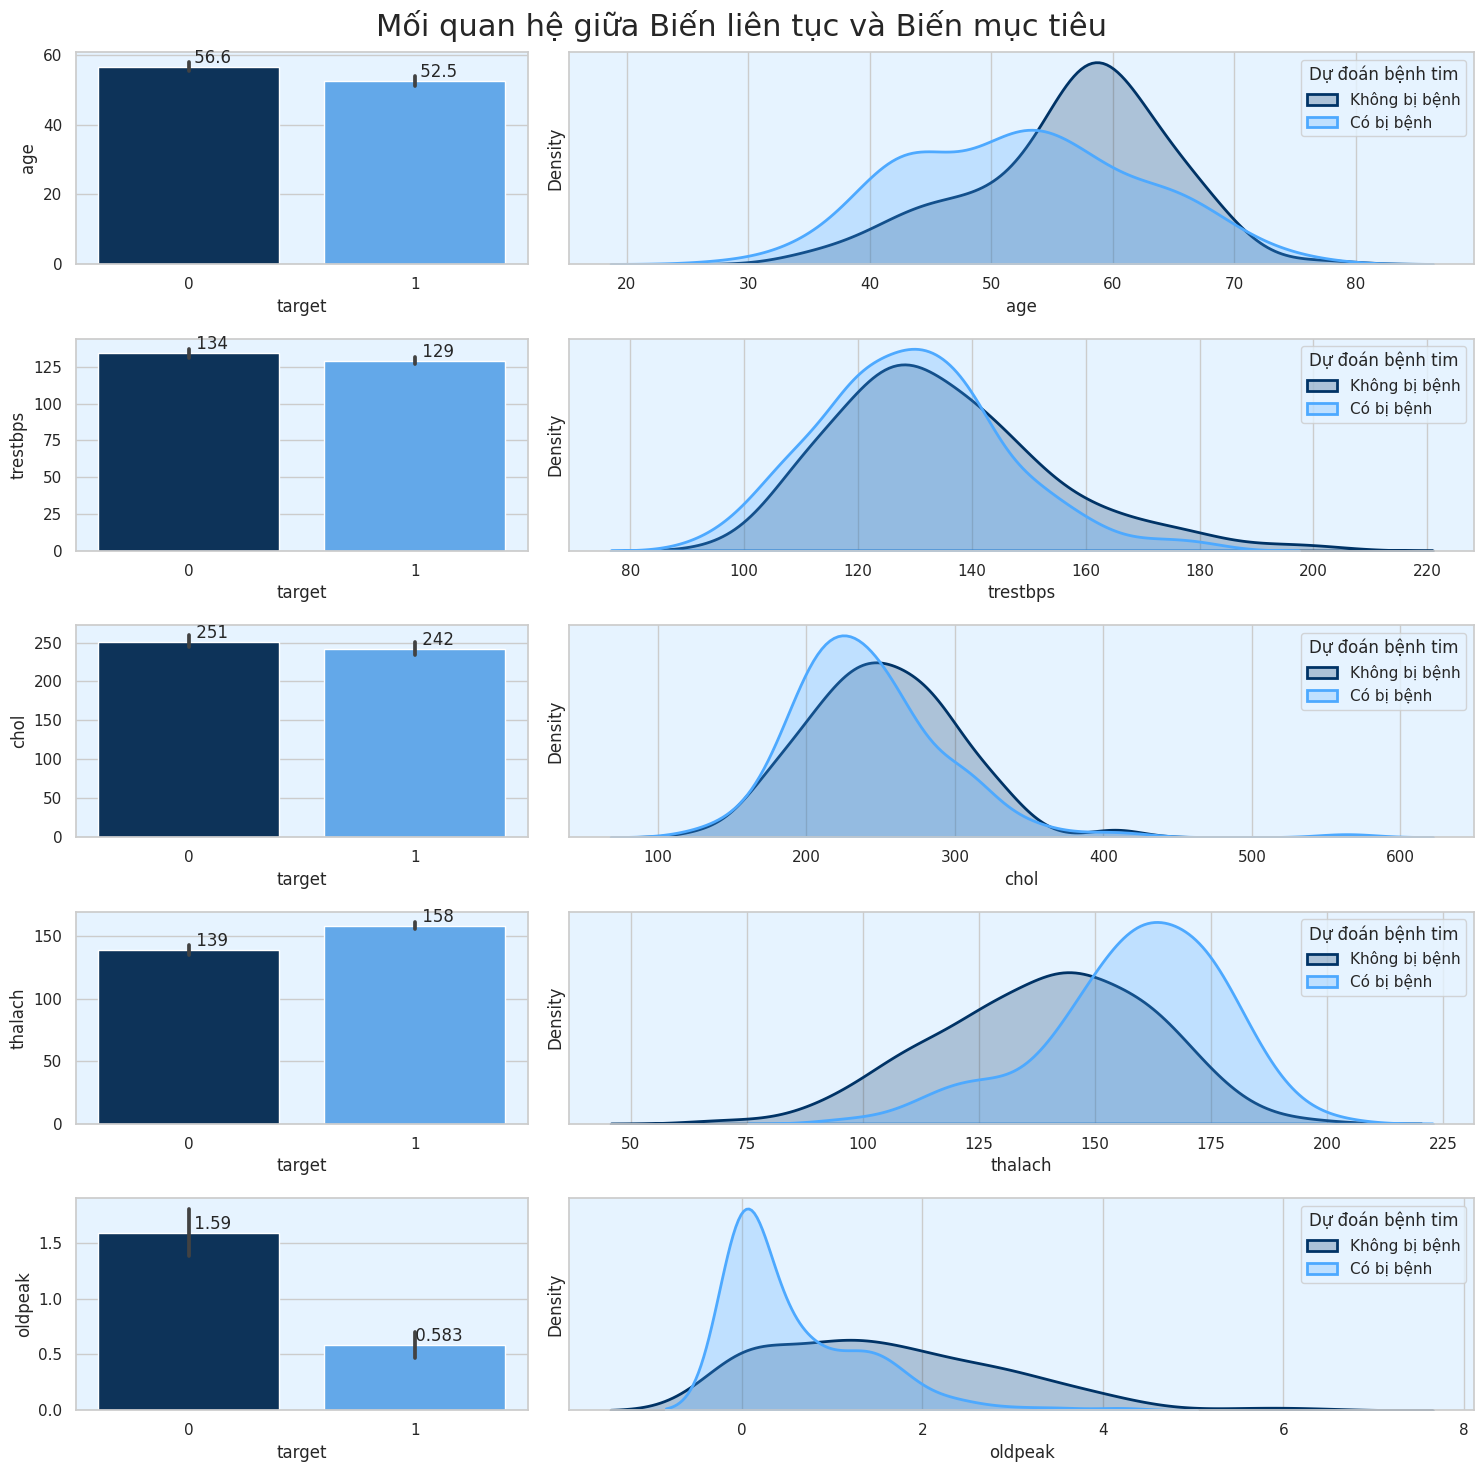

In [10]:
sns.set_palette(['#003366', '#4da9ff'])
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]}) # chia thành 3 phần Bar Plot chiếm 1 phần , KDE chiếm 2 phần


for i, col in enumerate(continuous_features):
    # Tạo bar plot => hiển thị mean value đối với từng giá trị đặc tính
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot cho thấy sự phân bổ của các giá trị thuộc tính đối với giá trị mục tiêu
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Không bị bệnh')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Có bị bệnh')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Dự đoán bệnh tim', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Mối quan hệ giữa Biến liên tục và Biến mục tiêu', fontsize=22)
plt.tight_layout()                     
plt.show()


**Nhận xét nhanh:**
> **Tuổi**(age): Bệnh nhân mắc bệnh tim có tuổi trung bình thấp hơn một chút so với nhóm không mắc bệnh

> **Huyết áp khi nghỉ ngơi** (trestbps): Phân bố tương đối giống nhau, không phải đặc trưng tốt để phân biệt.

> **Cholesterol huyết thanh** (chol): Cholesterol trung bình ở nhóm mắc bệnh tim thấp hơn một chút.

> **Nhịp tim tối đa** (thalach): Sự khác biệt rõ rệt, bệnh nhân mắc bệnh tim có nhịp tim tối đa cao hơn.

> **Trầm cảm ST** (oldpeak): Giá trị ở nhóm mắc bệnh tim thấp hơn đáng kể, phân bố tập trung gần 0.

In [11]:
categorical_features = [feature for feature in categorical_features if feature != 'target']

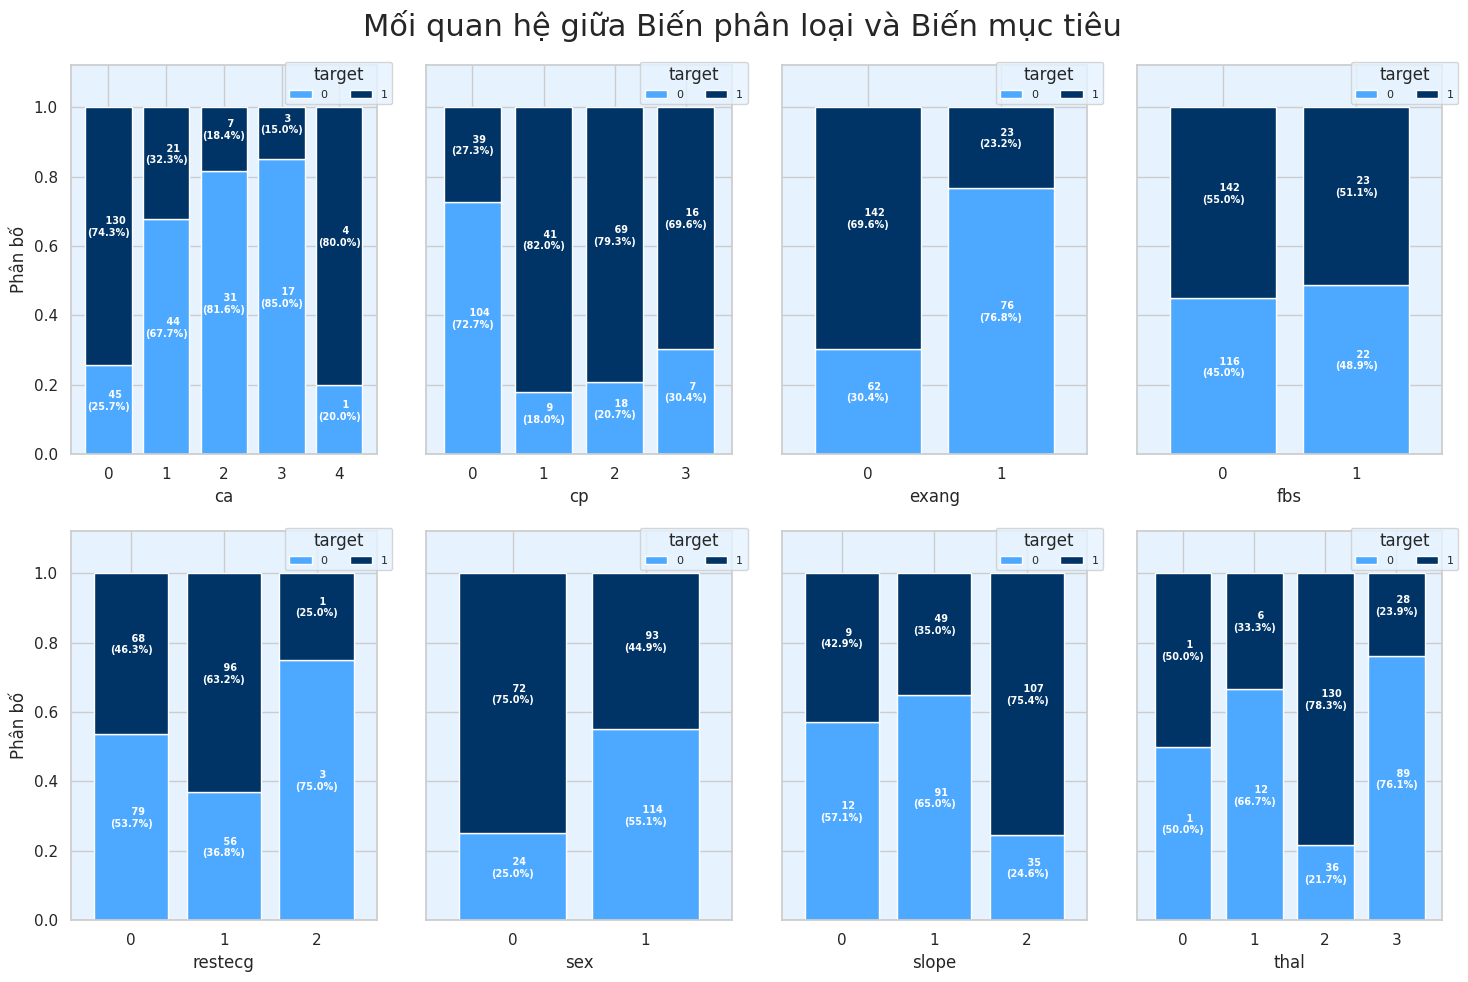

In [12]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#4da9ff', '#003366'])
    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Phân bố', sharey=True)
    
   
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx, y=(y_location-proportion)+(proportion/2), ha = 'center',
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "white", fontsize=7, fontweight="bold")
    
    
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
  
    ax[x,y].set_ylim([0,1.12])
   
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Mối quan hệ giữa Biến phân loại và Biến mục tiêu', fontsize=22)
plt.tight_layout()                     
plt.show()

<a id="basic"></a>
# <b><span style='color:#254E89'>3 |</span><span style='color:#254E89'> Độ tương quan của các biến đối với biến mục tiêu</span></b>

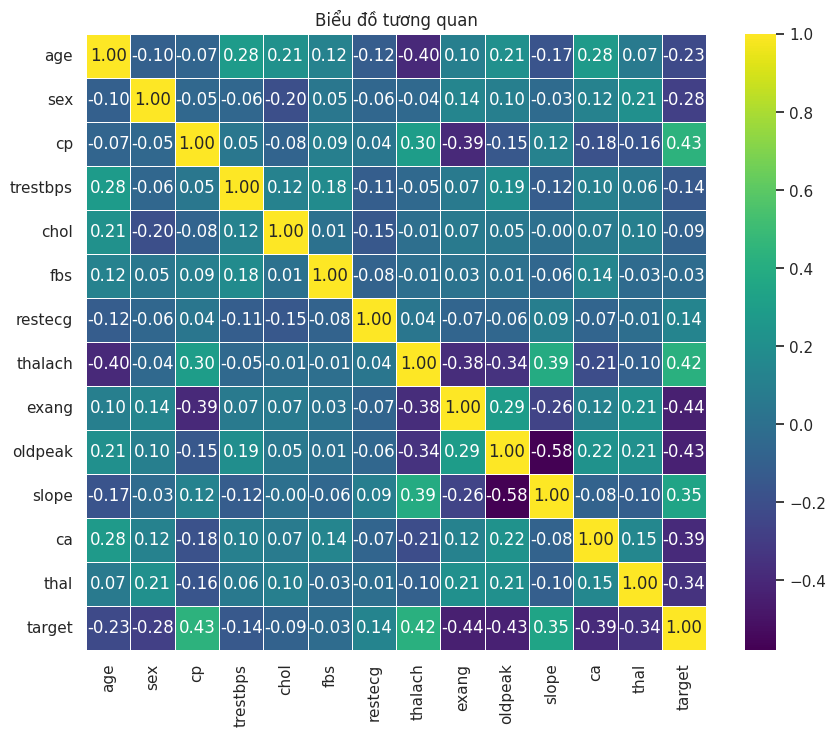

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ cột 'target' và tính toán ma trận tương quan
correlation_matrix = df.corr()

# Hiển thị ma trận tương quan dưới dạng heatmap với cmap đẹp
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Biểu đồ tương quan')
plt.show()


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Tính toán tương quan với biến target
correlation_with_target = df.corr()['target'].drop('target')

# Lấy giá trị tương quan tuyệt đối (abs) và sắp xếp từ mạnh đến yếu
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)
correlation_df = pd.DataFrame(correlation_with_target_sorted).reset_index()
correlation_df.columns = ['Đặc trưng', 'Tương quan với biến Target']

# Thêm cột "Loại tương quan" để phân loại thuận hoặc nghịch
correlation_df['Loại tương quan'] = correlation_df['Đặc trưng'].apply(
    lambda feature: 'Thuận' if correlation_with_target[feature] > 0 else 'Nghịch'
)
#Xem độ tương quan & loại tương quan
print(correlation_df)

   Đặc trưng  Tương quan với biến Target Loại tương quan
0      exang                    0.436757          Nghịch
1         cp                    0.433798           Thuận
2    oldpeak                    0.430696          Nghịch
3    thalach                    0.421741           Thuận
4         ca                    0.391724          Nghịch
5      slope                    0.345877           Thuận
6       thal                    0.344029          Nghịch
7        sex                    0.280937          Nghịch
8        age                    0.225439          Nghịch
9   trestbps                    0.144931          Nghịch
10   restecg                    0.137230           Thuận
11      chol                    0.085239          Nghịch
12       fbs                    0.028046          Nghịch


<a id="basic"></a>
# <b><span style='color:#254E89'>4 |</span><span style='color:#254E89'> Xử lý và chuyển đổi dữ liệu</span></b>

In [16]:
#Kiểm tra giá trị thiếu
df.isnull().sum().sum() 

0

In [17]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [18]:
#Xem giá trị ngoại lệ của các biến liên tục
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [19]:
#one-hot-coding các biến phân loại để tránh nhầm lẫn với kiểu dữ liệu có thứ tự
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [20]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


In [21]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] 

In [22]:
# Chia tập train-test tỉ lệ 0.75 và 0.25 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [23]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [24]:
#Biến đổi oldpeak > 0 để phù hợp điều kiện với Box-Cox ( Min của oldpeak = 0)
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

1.193525683096303
-0.5416573379978288
-0.1328088234935457
2.4235982035448527
0.18027410451832787


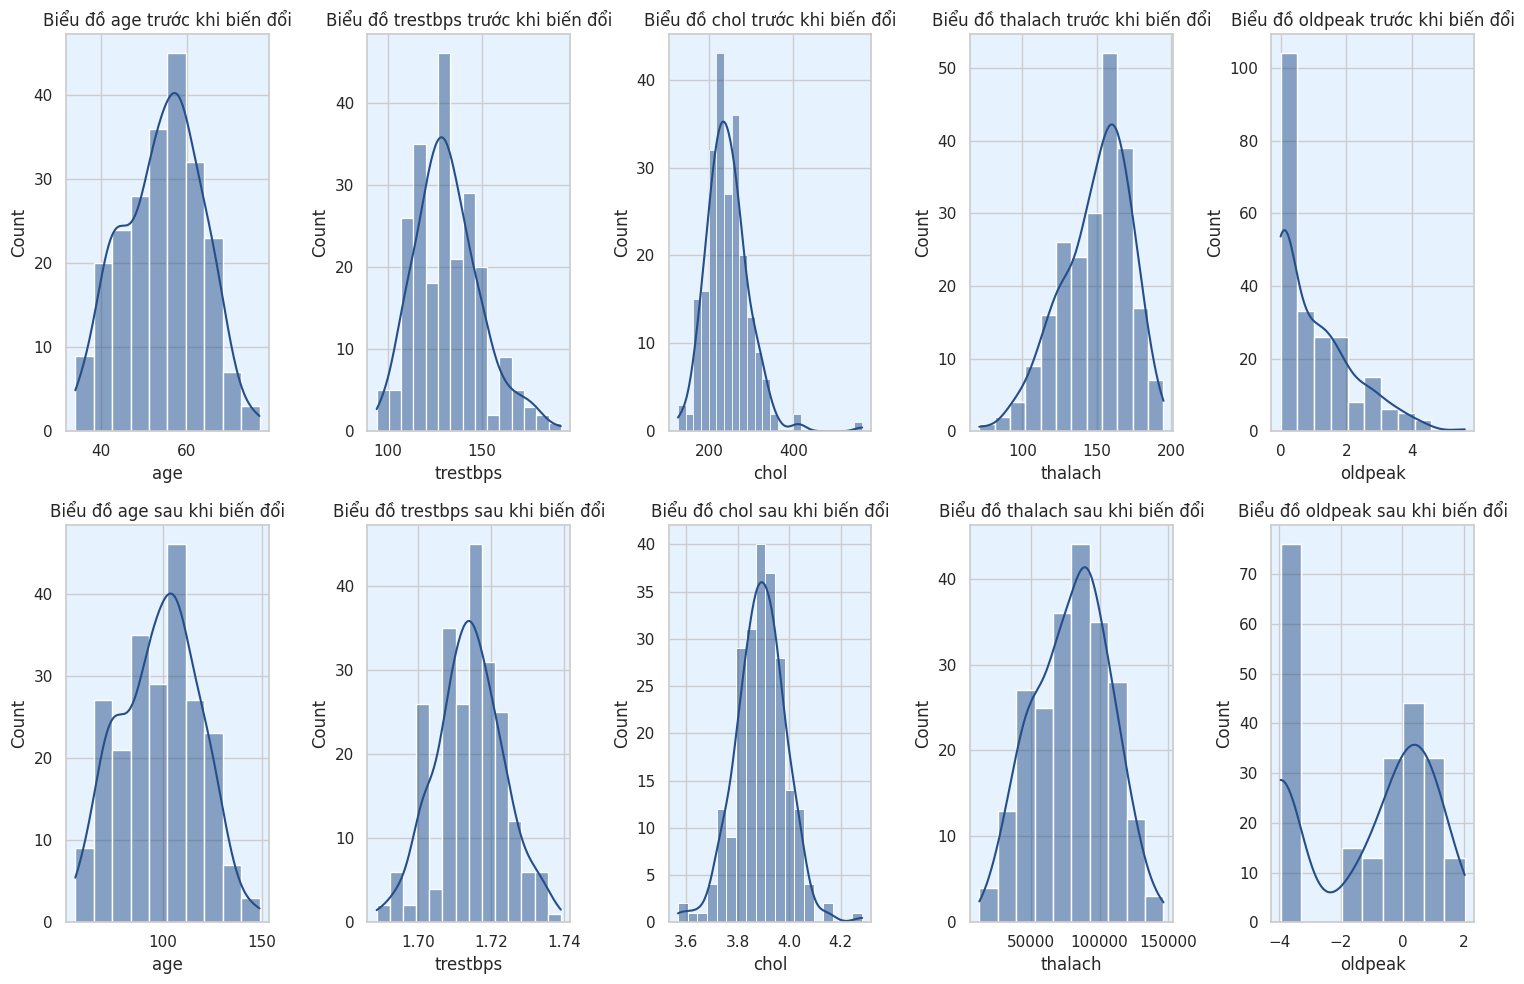

In [25]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(15,10))

#Phân bố dữ liệu khi chưa dùng Box Cox
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0, i], color='#254E89').set_title(f'Biểu đồ {col} trước khi biến đổi')

lambdas = {}

for i, col in enumerate(continuous_features):
    # Áp dụng Box-Cox lên
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Áp dụng Box-Cox lên X Test 
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='#254E89').set_title(f'Biểu đồ {col} sau khi biến đổi')
        print(lambdas[col])
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'Biểu đồ {col} (Không biến đổi được)')

fig.tight_layout()
plt.show()

In [26]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
100,71.698872,1,1.722950,3.901291,0,117395.574776,0,-0.217515,2,2,False,False,True,False,False,False,True,False
155,105.788567,0,1.713982,3.796709,0,55840.728780,0,-0.486492,1,0,False,False,False,True,False,False,True,False
66,90.614964,1,1.693794,3.855472,0,69056.622195,1,0.186212,1,0,False,True,False,True,False,False,True,False
187,97.071611,1,1.710555,3.942653,0,35763.298521,1,0.847768,1,1,False,False,False,False,False,False,False,True
108,88.478825,0,1.708124,3.901291,0,93435.966055,0,0.097058,2,0,True,False,False,True,False,False,True,False


<a id="basic"></a>
# <b><span style='color:#254E89'>5 |</span><span style='color:#254E89'> Xây dựng mô hình KNNs và áp dụng vào tập dữ liệu</span></b>

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
def tune_clf_hyperparameters_with_results(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier and logs results for all combinations of hyperparameters.
    It uses GridSearchCV with cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The function returns the classifier with the optimal hyperparameters, the hyperparameters, and a DataFrame of all results.
    '''
    # Create the cross-validation object
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    best_model = clf_grid.best_estimator_

    # Extract results into a DataFrame
    results_df = pd.DataFrame(clf_grid.cv_results_)

    # Filter columns for readability
    columns_to_keep = [
        'param_knn__n_neighbors', 'param_knn__weights', 'param_knn__p',
        'mean_test_score', 'mean_train_score', 'std_test_score'
    ]
    results_df = results_df[columns_to_keep].rename(
        columns={
            'param_knn__n_neighbors': 'n_neighbors',
            'param_knn__weights': 'weights',
            'param_knn__p': 'p',
            'mean_test_score': 'mean_accuracy',
            'mean_train_score': 'mean_train_accuracy',
            'std_test_score': 'std_accuracy'
        }
    )

    return best_model, best_hyperparameters, results_df

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [29]:
# Các tham số của KNNs
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan, 2: Euclidean 
}

In [30]:
#In 44 bộ siêu tham số -> sắp xếp độ chính xác của các bộ tham số -> in ra bộ tham số tối ưu nhất
best_knn, best_knn_hyperparams, knn_results = tune_clf_hyperparameters_with_results(
    knn_pipeline, knn_param_grid, X_train, y_train
)
print(knn_results.sort_values(by='mean_accuracy', ascending=False))
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

   n_neighbors   weights  p  mean_accuracy  mean_train_accuracy  std_accuracy
30           8   uniform  2       0.828304             0.845765      0.036770
24           7   uniform  1       0.823977             0.839230      0.044159
28           8   uniform  1       0.823918             0.821628      0.052630
26           7   uniform  2       0.815146             0.841423      0.038085
20           6   uniform  1       0.815088             0.825985      0.027785
41          11  distance  1       0.815029             1.000000      0.049041
40          11   uniform  1       0.815029             0.832636      0.049041
36          10   uniform  1       0.815029             0.823806      0.049041
32           9   uniform  1       0.814971             0.830458      0.053729
42          11   uniform  2       0.810643             0.834815      0.044442
39          10  distance  2       0.810643             1.000000      0.024291
38          10   uniform  2       0.810526             0.817227 

In [31]:
#Kết quả chạy trên tập huấn luyện
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       103
           1       0.88      0.81      0.85       124

    accuracy                           0.84       227
   macro avg       0.84      0.84      0.84       227
weighted avg       0.84      0.84      0.84       227



In [32]:
#Kết quả chạy trên tập test
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.84      0.78      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [33]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def print_confusion_matrix(model, X_test, y_test, title="Confusion Matrix"):
    # Dự đoán nhãn trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    # Hiển thị ma trận nhầm lẫn
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title(title)
    plt.show()


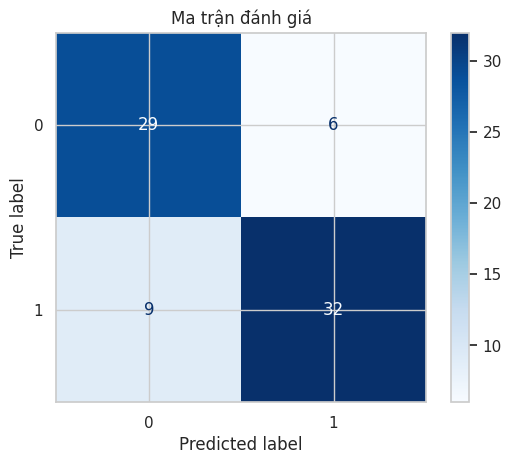

In [35]:
print_confusion_matrix(best_knn, X_test, y_test, title="Ma trận đánh giá")

In [36]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.76,0.84,0.83,0.78,0.79,0.81,0.8,0.8,0.8,0.8


<a id="basic"></a>
# <b><span style='color:#254E89'>6 |</span><span style='color:#254E89'> Dự đoán đầu vào ngẫu nhiên</span></b>

In [37]:
import joblib

# Lưu mô hình
joblib.dump(best_knn, 'knn_model.pkl')

['knn_model.pkl']

In [38]:
# import joblib
import numpy as np
from scipy.stats import boxcox

# Tải mô hình đã lưu bằng joblib
knn_model = joblib.load("knn_model.pkl")

# Nhập thông tin từ người dùng
age = int(input("Tuổi (Age): "))
sex = int(input("Giới tính (Sex, 0: Nữ, 1: Nam): "))
cp = int(input("Loại cơn đau ngực (Cp, 0: Thông thường, 1: Không điển hình, 2: Không phải do tim, 3: Không đau): "))
trestbps = int(input("Huyết áp khi nghỉ ngơi (Trestbps, từ 50 đến 200 mmHg): "))
chol = int(input("Mức cholesterol (Chol, từ 100 đến 500 mg/dl): "))
fbs = int(input("Đường huyết khi đói (Fbs, 0: < 120 mg/dl, 1: > 120 mg/dl): "))
restecg = int(input("Kết quả điện tâm đồ (Restecg, 0: Bình thường, 1: Sóng bất thường, 2: Sóng bất thường rõ): "))
thalach = int(input("Nhịp tim tối đa (Thalach, từ 70 đến 200 nhịp/phút): "))
exang = int(input("Đau ngực khi vận động (Exang, 0: Không, 1: Có): "))
oldpeak = float(input("Chênh lệch ST (Oldpeak, từ 0 đến 10 mm): "))
slope = int(input("Độ nghiêng ST (Slope, 0: Sóng dốc lên, 1: Sóng phẳng, 2: Sóng dốc xuống): "))
ca = int(input("Số mạch máu bị tắc nghẽn (Ca, từ 0 đến 4): "))
thal = int(input("Kết quả thalassemia (Thal, 0: Bình thường, 1: Bất thường cố định, 2: Có thể phục hồi, 3: Không rõ): "))

age = boxcox(age, lambdas['age'])
trestbps = boxcox(trestbps, lambdas['trestbps'])
chol = boxcox(chol, lambdas['chol'])
thalach = boxcox(thalach, lambdas['thalach'])
oldpeak = boxcox(oldpeak, lambdas['oldpeak'])

arr_cp = [False, False, False]
if cp in range(4):
    arr_cp[cp] = True

arr_restecg = [False, False]
if restecg in range(3):
    arr_restecg[restecg] = True
    
arr_thal = [False, False, False]
if thal in range(4):
    arr_thal[thal] = True

arr = [age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca]
data = arr + arr_cp + arr_restecg + arr_thal

input_data = np.array([data])
#print(input_data)

# Dự đoán
prediction = knn_model.predict(input_data)
if prediction[0] == 0:
    print("Kết quả dự đoán (Lưu ý: Độ chính xác 84%): Không có bệnh tim")
else:
    print("Kết quả dự đoán (Lưu ý: Độ chính xác 84%): Có bệnh tim")

Tuổi (Age):  35
Giới tính (Sex, 0: Nữ, 1: Nam):  1
Loại cơn đau ngực (Cp, 0: Thông thường, 1: Không điển hình, 2: Không phải do tim, 3: Không đau):  1
Huyết áp khi nghỉ ngơi (Trestbps, từ 50 đến 200 mmHg):  140
Mức cholesterol (Chol, từ 100 đến 500 mg/dl):  230
Đường huyết khi đói (Fbs, 0: < 120 mg/dl, 1: > 120 mg/dl):  1
Kết quả điện tâm đồ (Restecg, 0: Bình thường, 1: Sóng bất thường, 2: Sóng bất thường rõ):  0
Nhịp tim tối đa (Thalach, từ 70 đến 200 nhịp/phút):  150
Đau ngực khi vận động (Exang, 0: Không, 1: Có):  0
Chênh lệch ST (Oldpeak, từ 0 đến 10 mm):  2.3
Độ nghiêng ST (Slope, 0: Sóng dốc lên, 1: Sóng phẳng, 2: Sóng dốc xuống):  0
Số mạch máu bị tắc nghẽn (Ca, từ 0 đến 4):  0
Kết quả thalassemia (Thal, 0: Bình thường, 1: Bất thường cố định, 2: Có thể phục hồi, 3: Không rõ):  1


Kết quả dự đoán (Lưu ý: Độ chính xác 84%): Có bệnh tim
